4.1 로지스틱 회귀분석

In [29]:
import statsmodels.api as sm # statsmodels.api는 통계 모델링 및 추론을 위한 핵심 인터페이스 제
import pandas as pd

In [31]:
df = pd.read_csv('student_admission_train.csv', index_col = 0) #파일을 pandas.DataFrame 객체로 반환.
print(df.info()) #데이터프레임의 전체 구조 요약, column 목록과 결측치 여부를 파악할 수 있다.

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, 16 to 19
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gmat             30 non-null     int64  
 1   gpa              30 non-null     float64
 2   work_experience  30 non-null     int64  
 3   admitted         30 non-null     int64  
dtypes: float64(1), int64(3)
memory usage: 1.2 KB
None


In [33]:
print(df.head()) # 데이터프레임 상위 5개 뽑기

    gmat  gpa  work_experience  admitted
16   580  2.7                4         0
33   660  3.3                6         1
8    740  3.3                5         1
38   590  1.7                4         0
32   660  4.0                4         1


In [35]:
X = df[['gmat', 'gpa','work_experience']]
Y = df[['admitted']] #DataFrame X,Y에 들어갈 column 설정

print(type(X))
print(type(Y))
print(X.shape)
print(Y.shape) #X,Y의 type, 열, 행 개수 반환

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
(30, 3)
(30, 1)


In [37]:
X = sm.add_constant(X) #설명 변수 X에 상수항 열 추가.
model = sm.Logit(Y, X) 
# 종속 변수 Y와 설명 변수 X를 인자로 받아 Logit 모형 객체 생성.
# 내부적으로 로지스틱 함수(시그모이드)를 가정하고, 모수가 최대우도법으로 추정될 준비
results = model.fit() # 최대우도 추정 알고리즘 실행시켜 절편 각 설명 변수 계수, 표준오차, z-값, p-값 계산

Optimization terminated successfully.
         Current function value: 0.247296
         Iterations 8


In [39]:
print(results.summary())

                           Logit Regression Results                           
Dep. Variable:               admitted   No. Observations:                   30
Model:                          Logit   Df Residuals:                       26
Method:                           MLE   Df Model:                            3
Date:                Thu, 08 May 2025   Pseudo R-squ.:                  0.6432
Time:                        21:28:18   Log-Likelihood:                -7.4189
converged:                       True   LL-Null:                       -20.794
Covariance Type:            nonrobust   LLR p-value:                 6.639e-06
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -16.3315      8.601     -1.899      0.058     -33.189       0.526
gmat                0.0025      0.018      0.141      0.888      -0.032       0.037
gpa                 3.3208      

최소제곱 회귀분석 수행 -> 추정된 계수와 통계량 담은 RegressionResults 객체 반환
1. 절편(const), 기울기(area) 각각의 행을 보면
   coef가 실추정치, p>|t| < 0.05이면 보통 통계적으로 유의.
2. R-squared로 모델 설명력 파악
3. F-statistic과 그 p-값으로 "모델 전체가 유의한가" 확인.

In [42]:
#Logit.from_formula() 함수 이용
model = sm.Logit.from_formula('admitted ~ gmat + gpa + work_experience', df)
results = model.fit()

print(results.summary()) 

Optimization terminated successfully.
         Current function value: 0.247296
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:               admitted   No. Observations:                   30
Model:                          Logit   Df Residuals:                       26
Method:                           MLE   Df Model:                            3
Date:                Thu, 08 May 2025   Pseudo R-squ.:                  0.6432
Time:                        21:28:18   Log-Likelihood:                -7.4189
converged:                       True   LL-Null:                       -20.794
Covariance Type:            nonrobust   LLR p-value:                 6.639e-06
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         -16.3315      8.601     -1.899      0.058     -33.189       0.526
gmat          

 # R스타일의 수식 문법 사용해서 모델 정의
 df에서 해당하는 컬럼만 사용해 로지스틱회귀 모델 만들기
 Y : admitted
 X : gmat, gpa, work_experience

 model.fit() : 모델 학습시키기
 result.summary() : 결과 출력

In [45]:
new_candidates = {'const':[1],
                  'gmat': [590],
                  'gpa': [2],
                  'work_experience': [3]
                  }
df2 = pd.DataFrame(new_candidates)
print(df2)

   const  gmat  gpa  work_experience
0      1   590    2                3


1) 딕셔너리 생성
2) 딕셔너리 pandas DataFrame으로 변환

In [48]:
y_pred=results.predict(df2) # DataFrame객체 df2를 기존 학습된 모델 객체 results 사용해 합격확률 예측
print (y_pred) # 합격확률 출력

0    0.005377
dtype: float64


In [50]:
import numpy as np
threshold = 0.5 

y_pred = (y_pred > threshold).astype(np.int8) 
print(y_pred)

0    0
dtype: int8


(y_pred > threshold) # 예측 확률을 threshold 기준으로 대소비교해 T/F로 만들기.
boolean.astype(np.int8) # boolean형을 int형 8비트로 변환. -> 0,1

In [53]:
new_candidates = {'const':[1,1,1,1,1],
                  'gmat': [590,740,680,610,710],
                  'gpa': [2,3.7,3.3,2.3,3],
                  'work_experience': [3,4,6,1,5]
                  }

df2 = pd.DataFrame(new_candidates,columns= ['const', 'gmat', 'gpa','work_experience'])

print(df2)

   const  gmat  gpa  work_experience
0      1   590  2.0                3
1      1   740  3.7                4
2      1   680  3.3                6
3      1   610  2.3                1
4      1   710  3.0                5


새 데이터 데이터프레임으로 변환

In [56]:
y_pred=results.predict(df2) # DataFrame객체 df2를 기존 학습된 모델 객체 results 사용해 합격확률 예측
print (y_pred) # 각 데이터 관측치 행마다의 합격확률 출력

0    0.005377
1    0.857911
2    0.910066
3    0.002089
4    0.597692
dtype: float64


df2 데이터

In [59]:
y_pred = (y_pred > threshold).astype(np.int8) 
print(y_pred)

0    0
1    1
2    1
3    0
4    1
dtype: int8


(y_pred > threshold) # 예측 확률을 threshold 기준으로 대소비교해 T/F로 만들기.
boolean.astype(np.int8) # boolean형을 int형8비트로 변환. -> 0,1

4.2 머신러닝 기반 로지스틱 회귀분석

1) scikit-learn을 이용한 머신러닝

In [64]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [65]:
df = pd.read_csv('student_admission_train.csv', index_col = 0)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, 16 to 19
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gmat             30 non-null     int64  
 1   gpa              30 non-null     float64
 2   work_experience  30 non-null     int64  
 3   admitted         30 non-null     int64  
dtypes: float64(1), int64(3)
memory usage: 1.2 KB
None


In [66]:
print(df.head())

    gmat  gpa  work_experience  admitted
16   580  2.7                4         0
33   660  3.3                6         1
8    740  3.3                5         1
38   590  1.7                4         0
32   660  4.0                4         1


In [67]:
X = df[['gmat', 'gpa','work_experience']]
y = df['admitted']
print(X.shape)
print(y.shape) # 종속 변수 y와 설명변수 X에 들어갈 column 설정

(30, 3)
(30,)


In [68]:
model = LogisticRegression(random_state=0, fit_intercept = True)
model.fit(X, y) 

LogisticRegression(random_state=0)

random_state=0 : 모델의 결과가 실행 시마다 동일하게 나오도록 난수 생성.
fit_intercept=True : 절편(Intercept, 즉 y축과 만나는 점)을 학습에 포함.

In [70]:
#절편
print('Intercept:', model.intercept_)
#기울기
print('Coefficient:', model.coef_)

Intercept: [-17.61899536]
Coefficient: [[0.01779148 0.83600729 0.87068427]]


In [71]:
#4번째 자리까지 출력
#절편
print('Intercept: {:.4f}'.format(model.intercept_[0]))
#기울기
print('Coefficient: {:.4f}, {:.4f}, {:.4f}'.format(model.coef_[0][0], model.coef_[0][1], model.coef_[0][2]))

Intercept: -17.6190
Coefficient: 0.0178, 0.8360, 0.8707


In [72]:
new_candidates = {'gmat': [590],
                  'gpa': [2],
                  'work_experience': [3]
                  }
df2 = pd.DataFrame(new_candidates)
print(df2)

model.predict_proba(df2)

   gmat  gpa  work_experience
0   590    2                3


array([[0.94469256, 0.05530744]])

df2 데이터가 불합격할 확률 : 0.94469256
반대로 합격할 확률 : 0.05530744

In [75]:
model.predict(df2)
#임계값은 0.5가 디폴트 in scikit-learn

array([0], dtype=int64)

model.predict_proba(df2)는 입력 데이터가 각 클래스에 속할 확률 반환
model.predict(df2) 내부적으로 predict_proba로 계산된 확률 중 가장 높은 값의 클래스 반환

In [79]:
new_candidates = { 'gmat': [590,740,680,610,710],
                  'gpa': [2,3.7,3.3,2.3,3],
                  'work_experience': [3,4,6,1,5]
                  }
df2 = pd.DataFrame(new_candidates)
print(df2)

model.predict(df2)

   gmat  gpa  work_experience
0   590  2.0                3
1   740  3.7                4
2   680  3.3                6
3   610  2.3                1
4   710  3.0                5


array([0, 1, 1, 0, 1], dtype=int64)

관측치가 여러개라면 model.predict(df2)는 리스트 형태로 변환

2) 파이토치를 이용한 머신러닝

In [82]:
df = pd.read_csv('student_admission_train.csv', index_col = 0)

X = df.drop('admitted' , axis = 1).values #independent Feature
y = df['admitted'].values #dependent Feature
print(X.shape)
print(y.shape)

(30, 3)
(30,)


In [83]:
import torch 
from torch import sigmoid
import torch.nn.functional as F

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

X_tensor = torch.FloatTensor(X).to(device)
y_tensor = torch.FloatTensor(y).view(-1,1).to(device)

torch.manual_seed(1)

W = torch.zeros((3, 1), device=device, requires_grad=True)
b = torch.zeros(1, device=device, requires_grad=True)

learning_rate = 0.01
optimizer=torch.optim.Adam([W,b],lr=learning_rate)
epochs=10000

for epoch in range(epochs):
    y_pred = torch.sigmoid(X_tensor.matmul(W)+ b).to(device)
    #y_pred = torch.sigmoid(torch.matmul(X_tensor, W)+ b)     
    #loss = F.binary_cross_entropy(y_pred, y_tensor)
    loss = -(y_tensor * torch.log(y_pred) + 
             (1 - y_tensor) * torch.log(1 - y_pred)).mean()

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
   
    if (epoch+1) % 1000 == 0:
        print('epoch=',epoch+1, 'a=',W.detach().cpu().numpy(),
              'b=',b.detach().cpu().numpy(),'loss=',loss.detach().cpu().numpy())

epoch= 1000 a= [[-0.01169533]
 [ 1.9504068 ]
 [ 1.0378832 ]] b= [-2.3987286] loss= 0.3374268
epoch= 2000 a= [[-0.01215907]
 [ 3.0220308 ]
 [ 1.0444837 ]] b= [-5.6585793] loss= 0.2865036
epoch= 3000 a= [[-0.00905306]
 [ 3.339009  ]
 [ 1.0350251 ]] b= [-8.757873] loss= 0.26448804
epoch= 4000 a= [[-0.00569269]
 [ 3.3631778 ]
 [ 1.021436  ]] b= [-11.046716] loss= 0.2549835
epoch= 5000 a= [[-2.1919976e-03]
 [ 3.3428140e+00]
 [ 1.0121241e+00]] b= [-12.677419] loss= 0.25933063
epoch= 6000 a= [[-1.3391834e-03]
 [ 3.3282416e+00]
 [ 1.0074722e+00]] b= [-13.817789] loss= 0.24887177
epoch= 7000 a= [[-4.1423918e-05]
 [ 3.3234074e+00]
 [ 1.0082692e+00]] b= [-14.611864] loss= 0.24805236
epoch= 8000 a= [[6.9875485e-04]
 [3.3230114e+00]
 [1.0039994e+00]] b= [-15.16187] loss= 0.24763002
epoch= 9000 a= [[1.0521107e-03]
 [3.3246987e+00]
 [1.0062765e+00]] b= [-15.542993] loss= 0.24849261
epoch= 10000 a= [[1.6404578e-03]
 [3.3267021e+00]
 [1.0027853e+00]] b= [-15.806049] loss= 0.24737473


import torch 
from torch import sigmoid
import torch.nn.functional as F 
device = torch.device("cuda" if torch.cuda.is_available() else "cpu") 
# 라이브러리 및 장치 설정
- device : GPU 사용 가능 여부 확인 후 장치 설정
  

X_tensor = torch.FloatTensor(X).to(device)
y_tensor = torch.FloatTensor(y).view(-1,1).to(device)

# 데이터 텐서 변환 
- 입력 데이터(x)와 타겟(y)를 FloatTensor로 변환 후 G화PU로 이동.
- view (-1, 1) : y를 2D 텐서로 변환. 첫 번째 차원의 길이는 파이토치가 변환. 두 번째 차원의 길이는 1


torch.manual_seed(1)

W = torch.zeros((3, 1), device=device, requires_grad=True)
b = torch.zeros(1, device=device, requires_grad=True)

# 가중치 초기화
manual_seed(1): 재현성을 위한 난수 시드 고정

W (가중치): 크기 (3, 1)의 0 텐서, 그래디언트 추적 활성화

b (편향): 크기 1의 0 텐서, 그래디언트 추적 활성화


learning_rate = 0.01
optimizer = torch.optim.Adam([W,b], lr=learning_rate)
epochs = 10000

# 옵티마이저 설정
Adam 옵티마이저를 사용하여 W와 b를 최적화

학습률(lr)은 0.01, 총 에포크는 10,000회


for epoch in range(epochs):
    y_pred = torch.sigmoid(X_tensor.matmul(W)+ b).to(device) 
    #y_pred = torch.sigmoid(torch.matmul(X_tensor, W)+ b)     
    #loss = F.binary_cross_entropy(y_pred, y_tensor)
    loss = -(y_tensor * torch.log(y_pred) + 
             (1 - y_tensor) * torch.log(1 - y_pred)).mean()

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
   
    if (epoch+1) % 1000 == 0:
        print('epoch=',epoch+1, 'a=',W.detach().cpu().numpy(),
              'b=',b.detach().cpu().numpy(),'loss=',loss.detach().cpu().numpy())
              
# 학습 루프

예측값 계산
y_pred = torch.sigmoid(X_tensor.matmul(W) + b)

- X_tensor.matmul(W): 입력과 가중치의 행렬 곱 (선형 결합)

- sigmoid: 선형 결과를 0~1 확률로 변환


손실 함수
-(y_tensor * log(y_pred) + (1 - y_tensor) * log(1 - y_pred)).mean()

- 이진 교차 엔트로피(Binary Cross Entropy)를 수동으로 구현



역전파

- zero_grad(): 그래디언트 초기화

- backward(): 손실에 대한 그래디언트 계산

- step(): 옵티마이저로 가중치 업데이트




In [85]:
new_candidates = {'gmat': [590],
                  'gpa': [2],
                  'work_experience': [3]
                  }
df2 = pd.DataFrame(new_candidates) # 딕셔너리 -> Pandas DataFrame
print(df2)

X = df2.values # df2.values는 DataFrame을 numpy array(2차원)로 변환.
X_tensor = torch.FloatTensor(X).to(device) # 넘파이 배열을 파이토치의 FloatTensor로 변환 후, 변환 후 텐서를 GPU로 이동.
print(X_tensor)

   gmat  gpa  work_experience
0   590    2                3
tensor([[590.,   2.,   3.]])


In [86]:
threshold = 0.5
y_pred = torch.sigmoid(X_tensor.matmul(W)+ b).to(device)
print(y_pred) 
prediction = y_pred >= torch.FloatTensor([0.5]).to(device)
print(prediction)
prediction = (y_pred.detach().cpu().numpy() > threshold).astype(np.int8)
print(prediction)

tensor([[0.0056]], grad_fn=<SigmoidBackward0>)
tensor([[False]])
[[0]]


## 시그모이드 함수 적용
threshold = 0.5
y_pred = torch.sigmoid(X_tensor.matmul(W)+ b).to(device)
print(y_pred) 

입력 데이터, 가중치, 편향을 선형 결합 후 시그모이드 함수 적용.
.to(device)로 결과를 device(GPU)로 이동.

## 임계값 비교(텐서 연산)
prediction = y_pred >= torch.FloatTensor([0.5]).to(device)
print(prediction)

예측값이 0.5이상인지 비교해, 0.5 이상이면 True, 아니면 False 반환 후 결과를 device(GPU)로 이동.

##  넘파이 배열로 변환 및 정수형 변환
prediction = (y_pred.detach().cpu().numpy() > threshold).astype(np.int8)
print(prediction)

.detach()로 연산 그래프에서 분리하고, .cpu()로 CPU로 이동, .numpy()로 넘파이 배열로 변환 후 True, False를 1,0 으로 변환

In [88]:
new_candidates = { 'gmat': [590,740,680,610,710],
                  'gpa': [2,3.7,3.3,2.3,3],
                  'work_experience': [3,4,6,1,5]
                  }
df2 = pd.DataFrame(new_candidates)
print(df2)

X = df2.values
X_tensor = torch.FloatTensor(X).to(device)
print(X_tensor)

   gmat  gpa  work_experience
0   590  2.0                3
1   740  3.7                4
2   680  3.3                6
3   610  2.3                1
4   710  3.0                5
tensor([[590.0000,   2.0000,   3.0000],
        [740.0000,   3.7000,   4.0000],
        [680.0000,   3.3000,   6.0000],
        [610.0000,   2.3000,   1.0000],
        [710.0000,   3.0000,   5.0000]])


딕셔너리형에서 pandas DataFrame으로, 다시 torch의 FloatTensor로 변환.

In [90]:
y_pred = torch.sigmoid(X_tensor.matmul(W)+ b).to(device)
print(y_pred)
prediction = y_pred >= torch.FloatTensor([0.5]).to(device)
print(prediction)
prediction = (y_pred.detach().cpu().numpy() > threshold).astype(np.int8) 
print(prediction)

tensor([[0.0056],
        [0.8491],
        [0.9092],
        [0.0021],
        [0.5873]], grad_fn=<SigmoidBackward0>)
tensor([[False],
        [ True],
        [ True],
        [False],
        [ True]])
[[0]
 [1]
 [1]
 [0]
 [1]]


시그모이드 함수 적용
y_pred = torch.sigmoid(X_tensor.matmul(W)+ b).to(device)
print(y_pred)

입력 데이터, 가중치, 편향을 선형 결합 후 시그모이드 함수 적용. .to(device)로 결과를 device(GPU)로 이동.

임계값 비교(텐서 연산)¶
prediction = y_pred >= torch.FloatTensor([0.5]).to(device)
print(prediction)

각각의 아이템에 대해 예측값이 0.5이상인지 비교해, 0.5 이상이면 True, 아니면 False 반환 후 결과를 device(GPU)로 이동.

넘파이 배열로 변환 및 정수형 변환
prediction = (y_pred.detach().cpu().numpy() > threshold).astype(np.int8) 
print(prediction)

.detach()로 연산 그래프에서 분리하고, .cpu()로 CPU로 이동, .numpy()로 넘파이 배열로 변환 후 True, False를 1,0 으로 변환

* 크로스 엔트로피 함수

In [101]:
import torch
import torch.nn as nn

output =torch.tensor([[0.1, 0.2, 0.6, 0.1]],dtype=torch.float)
target = torch.tensor([2],dtype=torch.long)
ce_loss = nn.CrossEntropyLoss()
loss = ce_loss(output, target)
print('ce_loss :', loss.item())

ce_loss : 1.058963656425476


output : 모델의 출력값 4개 클래스에 대한 예측 점수 나타내는 텐서

target : 실제 정답 클래스 인덱스 담은 텐서

nn.CrossEntropyLoss() : 내부적으로 softmax와 log연산 수행. 예측값과 정답간 차이 계산.

loss : 예측값과 정답간 차이를 나타내는 손실값

In [103]:
#식 직접 구현
output =torch.tensor([[0.1, 0.2, 0.6, 0.1]],dtype=torch.float)
target = torch.tensor([0.0, 0.0, 1.0, 0.0])
softmax = nn.functional.softmax(output, dim=1)
print('output : ', output)
print('softmax :', softmax)
print('target : ', target)
ce_loss= -torch.sum(target*torch.log(softmax))
print('ce_loss :', ce_loss.item())

output :  tensor([[0.1000, 0.2000, 0.6000, 0.1000]])
softmax : tensor([[0.2104, 0.2325, 0.3468, 0.2104]])
target :  tensor([0., 0., 1., 0.])
ce_loss : 1.0589637756347656


CrossEntropyLoss()를 직접 계산한 코드.
output은 2D 텐서라 dim = 1
softmax 값 -> 이것에 log 씌우고 target 곱해주기 -> 이 값들 다 더해주고 - 붙여주기.

In [105]:
#binary target
output =torch.tensor([6, 4],dtype=torch.float)
target = torch.tensor([1.0, 0.0])
softmax = nn.functional.softmax(output, dim=0)
bce_loss = nn.BCELoss()
loss = bce_loss(softmax, target)
print('bce_loss :', loss.item())

bce_loss : 0.12692803144454956


이진 분류

output은 1D 텐서라 dim = 1은 오류 발생.

functional.softmax()에서 dim = 0은 벡터 전체를 softmax 처리하겠다는 뜻,

BCELoss는 독립적인 이진 분류에 적합한 손실 함수. 때문에 softmax와 같이 쓰게 되면 부정확해진다.


In [107]:
#직접 구현
output =torch.tensor([6, 4],dtype=torch.float)
target = torch.tensor([1.0, 0.0])
softmax = nn.functional.softmax(output, dim=0)
print('output : ', output)
print('softmax :', softmax)
print('target : ', target)
bce_loss= -torch.sum(target*torch.log(softmax))
print('bce_loss :', bce_loss.item())

output :  tensor([6., 4.])
softmax : tensor([0.8808, 0.1192])
target :  tensor([1., 0.])
bce_loss : 0.12692806124687195


이진 분류 직접 구현.

BCE Loss=−[y⋅log(p)+(1−y)⋅log(1−p)]

Loss식은 위와 같다. 첫 번째 값이 1에 가까울수록 손실값이 작아진다.

In [109]:
#배치 4개, 클래스 2개
torch.manual_seed(1) # 랜덤 값 항상 동일하게 나오도록 시드 고정.

m = nn.Sigmoid() 
bce_loss = nn.BCELoss() # Sigmoid()와 BCELoss()의 객체 생성
input = torch.randn(4, requires_grad=True) # 정규분포에서 4개 값 무작위 생성, 역전파 가능.
print(input)
target = torch.empty(4).random_(2) # 0또는 1의 값을 무작위로 4개 생성.
print(target)
print('sigmoid : ', m(input)) # input을 Sigmoid로 출력.
loss = bce_loss(m(input), target) # Sigmoid결과와 target을 비교해 평균 BCE Loss 계산.
print('bce_loss : ', loss)

tensor([0.6614, 0.2669, 0.0617, 0.6213], requires_grad=True)
tensor([1., 0., 0., 1.])
sigmoid :  tensor([0.6596, 0.5663, 0.5154, 0.6505], grad_fn=<SigmoidBackward0>)
bce_loss :  tensor(0.6015, grad_fn=<BinaryCrossEntropyBackward0>)


In [110]:
# 직접 구현
torch.manual_seed(1) # 랜덤 값 항상 동일하게 나오도록 시드 고정.

m = nn.Sigmoid()
input = torch.randn(4, requires_grad=True) # 정규분포에서 4개 값 무작위 생성, 역전파 가능.
print(input)
target = torch.empty(4).random_(2) # 0또는 1의 값을 무작위로 4개 생성
print(target)
def BCE(input, target):
    total_bce_loss = torch.sum(-target * torch.log(m(input)) - (1 - target) * torch.log(1 - m(input)))
    num_of_samples = input.shape[0] # input.shape -> (4,) 이므로 input.shape[0] -> 4
    mean_bce_loss = total_bce_loss / num_of_samples # BCE Loss=−[y⋅log(p)+(1−y)⋅log(1−p)]
    return mean_bce_loss    
print('sigmoid : ', m(input))
loss = BCE(input, target)
print('bce_loss : ', loss) # Sigmoid결과와 target을 비교해 평균 BCE Loss 계산.

tensor([0.6614, 0.2669, 0.0617, 0.6213], requires_grad=True)
tensor([1., 0., 0., 1.])
sigmoid :  tensor([0.6596, 0.5663, 0.5154, 0.6505], grad_fn=<SigmoidBackward0>)
bce_loss :  tensor(0.6015, grad_fn=<DivBackward0>)


4.4 머신러닝을 이용한 분류모델의 성능 평가

In [112]:
#ROC 곡선 그리기
fpr = np.array([1, 0.5, 0.25, 0.25, 0, 0])
tpr = np.array([1, 1, 0.5, 0.33, 0.33, 0])

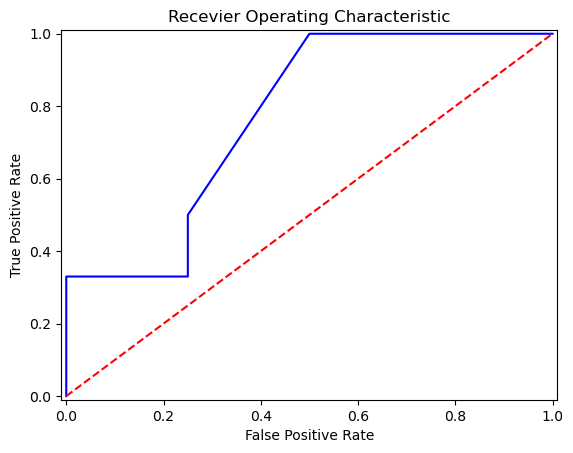

In [113]:
import matplotlib.pyplot as plt
plt.title('Recevier Operating Characteristic')
plt.plot(fpr, tpr, 'b')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.01,1.01])
plt.ylim([-0.01,1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

#임계값을 더 세분하면 더 부드러운 곡선 얻을 수 있음

Receiver Operating Characteristic(ROC)는 "수신자 조작 특성"을 의미하고, 분류 모델의 성능을 평가하는 그래프를 의미한다.

민감도(참양성비율,TPR)와 특이도(거짓양성비율,FPR)의 관계를 시각화한 것.

x축: FPR (False Positive Rate, 1 - 특이도)

y축: TPR (True Positive Rate, 민감도, 재현율)

이 곡선은 임계값을 바꿔가며 예측값이 얼마나 잘 맞는지, 즉 실제 양성과 음성을 얼마나 잘 구분하는지 보여준다.

ROC 곡선 아래 면적(AUC, Area Under the Curve)는 모델의 종합적인 분류 성능을 하나의 숫자로 나타내며, 1에 가까울수록 더 좋은 모델.

In [115]:
#scikit-learn 이용한 ROC 곡선
from sklearn import metrics

y_true = np.array([1, 1, 2, 2])
y_score = np.array([0.1, 0.4, 0.35, 0.8])
fpr, tpr, thresholds = metrics.roc_curve(y_true, y_score, pos_label=2)
print("FPR : ", fpr)
print("TPR : ", tpr)
print("thresholds :", thresholds)

FPR :  [0.  0.  0.5 0.5 1. ]
TPR :  [0.  0.5 0.5 1.  1. ]
thresholds : [ inf 0.8  0.4  0.35 0.1 ]


y_true: 정답 클래스 레이블. 클래스 1이 음성, 클래스 2가 양성

y_score: 각 샘플에 대해 모델이 예측한 "양성 클래스(클래스 2)"에 대한 점수(확률 또는 신뢰도).
점수가 높을수록 클래스 2일 가능성이 크다.

metrics.roc_curve(y_true, y_score, pos_label=2)

FPR (False Positive Rate): 거짓 양성 비율

TPR (True Positive Rate, aka recall): 진짜 양성 비율


thresholds: 예측 점수 임계값, ROC 곡선 그릴 때 예측 점수(y_score)의 고유값을 기준으로 자동으로 정해짐. scikit-learn의 roc_curve 함수는 y_score의 내림차순 고유값을 기준으로 threshold를 정해 각 threshold에서 양성/음성 예측 결과를 바꿔가며 FPR,TPR 게산

[TPR, FPR 산식]

TP : 실제 양성(클래스 2)이고, 예측도 양성(클래스 2)인 경우의 개수

FN : 실제 양성(클래스 2)인데, 예측은 음성(클래스 1)인 경우의 개수

FP : 실제 음성(클래스 1)인데, 예측도 양성(클래스 2)인 경우의 개수

TP : 실제 음성(클래스 1)이고, 예측도 음성(클래스 1)인 경우의 개수

TPR = TP / (TP + FN)

FPR = FP / (FP + TN)

각 임계값(thresholds)을 기준으로 예측 점수가 그 이상이면 "양성(클래스 2)"로 판단.


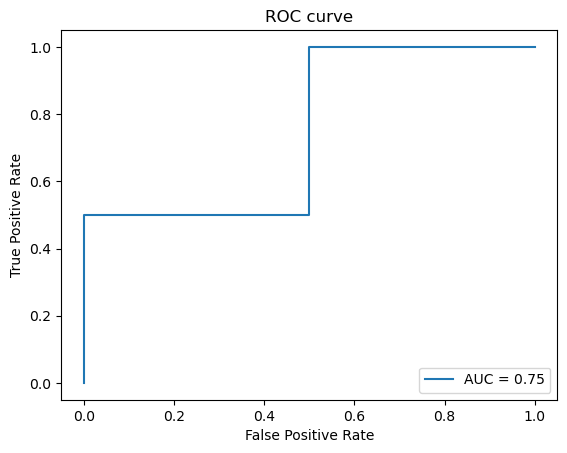

In [117]:
auc = metrics.roc_auc_score(y_true, y_score)

plt.title('ROC curve')
plt.plot(fpr, tpr, label="AUC = "+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

1. AUC는 곡선 아래 면적 의미, 값이 1에 가까울수록 분류 성능 우수
2. plt.plot(fpr, tpr, label="AUC = "+str(auc)) -> FPR x축, TPR y축 ROC 곡선 그리기. 범례에 AUC값 표시
3. plt.xlabel, plt.ylabel : 각 축의 이름을 지정
4. plt.legend(loc=4) : 범례를 그래프의 오른쪽 아래(4번 위치)에 표시
5. plt.show() : 그래프를 화면에 출력

In [119]:
BMI = [33.6, 26.6, 28.1, 31.0, 30.5, 25.8, 45.8, 43.3, 39.3, 29.0, ]
diabetic = [1, 0, 0, 1, 1,  0, 1, 1, 0, 1]

df = pd.DataFrame(
    {"BMI": BMI, "diabetic": diabetic}
)

print(df.head()) #pandas DataFrame 객체 df로 데이터 저장

    BMI  diabetic
0  33.6         1
1  26.6         0
2  28.1         0
3  31.0         1
4  30.5         1


In [120]:
X = df[['BMI']]
Y = df['diabetic'] # 종속 변수, 독립 변수 지정

In [121]:
model = LogisticRegression(random_state = 0) 
model.fit(X,Y) # 로지스틱 회귀 실행

LogisticRegression(random_state=0)

model = LogisticRegression(random_state = 0)
객체 생성 및 내부 난수 발생 시드 고정해 결과 고정.
model.fit(X,Y)
입력 데이터와 정답을 이용해 로지스틱 회귀 모델 학습.

In [123]:
print(model.intercept_)
print(model.coef_[0]) # 절편 값과 계수 출력

[-4.58164432]
[0.15420843]


In [124]:
def sigmoid(x):
  return 1/ (1 + np.exp(-(x)))

In [125]:
y_pred_prob = sigmoid(model.coef_[0]*X+model.intercept_)
print(y_pred_prob) # 모델 학습 출력 결과를 시그모이드에 대입. 단, 행렬 곱이 아니라 model.coef_[0] 상수곱

        BMI
0  0.645601
1  0.382323
2  0.438220
3  0.549541
4  0.530391
5  0.353642
6  0.922806
7  0.890473
8  0.814383
9  0.472627


print(y_pred_prob) # 모델 학습 출력 결과를 시그모이드에 대입. 단, 행렬 곱이 아니라 model.coef_[0] 상수곱으로 곱해줌.

thresholds= [       inf 0.92280631 0.8904729  0.81438323 0.47262742 0.35364236]


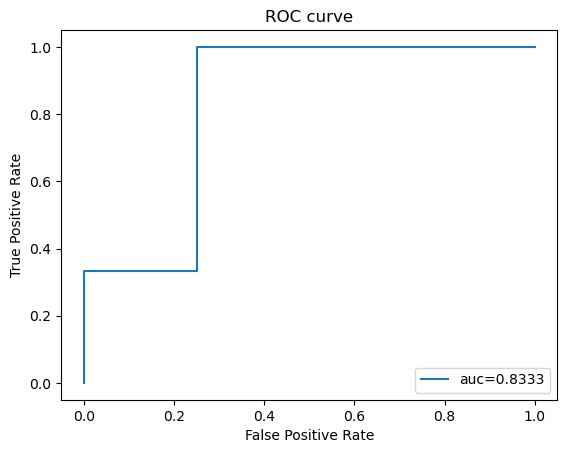

In [127]:
plt.title('ROC curve')
fpr, tpr, thresholds = metrics.roc_curve(Y,  y_pred_prob)
print('thresholds=', thresholds)
auc = metrics.roc_auc_score(Y, y_pred_prob)
auc = round(auc,4) 
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

plt.title('ROC curve')
fpr, tpr, thresholds = metrics.roc_curve(Y,  y_pred_prob)
* ROC 곡선 데이터 계산
print('thresholds=', thresholds)
auc = metrics.roc_auc_score(Y, y_pred_prob)
* 모델의 분류 성능 0~1 사이 값으로 요약. 
auc = round(auc,4)
* 소수점 4자리로 반올림.
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
* 오른쪽 아래에 배치.
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [129]:
#좀 더 세련된 코드
BMI = [33.6, 26.6, 28.1, 31.0, 30.5, 25.8, 45.8, 43.3, 39.3, 29.0, ]
diabetic = [1, 0, 0, 1, 1,  0, 1, 1, 0, 1]

df = pd.DataFrame(
    {"BMI": BMI, "diabetic": diabetic}
)
#pandas DataFrame 객체 df로 데이터 저장
X = df[['BMI']]
Y = df['diabetic']
# 종속 변수, 독립 변수 지정
model = LogisticRegression(random_state=0) 
model.fit(X, Y) # 로지스틱 회귀 모델 학습

LogisticRegression(random_state=0)

위와 동일.

prediced probability shape= (10, 2)
prediced probability =
 [[0.35439886 0.64560114]
 [0.61767706 0.38232294]
 [0.56177957 0.43822043]
 [0.45045884 0.54954116]
 [0.46960932 0.53039068]]
y=1, prediced probability = [0.64560114 0.38232294 0.43822043 0.54954116 0.53039068]
threshold = [       inf 0.92280631 0.8904729  0.81438323 0.47262742 0.35364236]


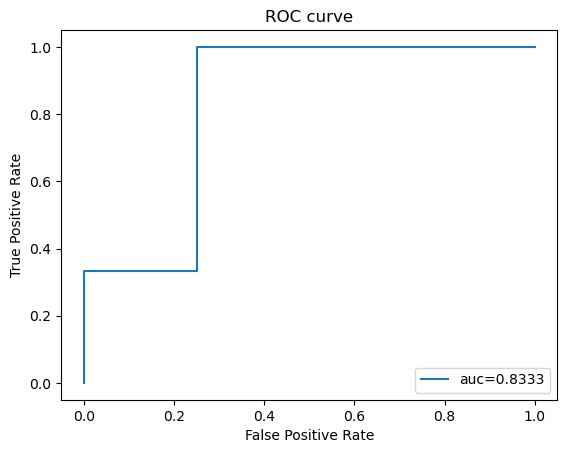

In [131]:
plt.title('ROC curve')
y_pred_proba = model.predict_proba(X) 
print("prediced probability shape=", y_pred_proba.shape)
print("prediced probability =\n", y_pred_proba[0:5,:])
# 레이블 값이 1일때의 예측 확률을 추출 
y_pred_proba = model.predict_proba(X)[:,1] # 레이블 1에 대한 확률만 추출
print("y=1, prediced probability =", y_pred_proba[0:5])
fpr, tpr, thresholds = metrics.roc_curve(Y,  y_pred_proba)
print("threshold =", thresholds)
auc = metrics.roc_auc_score(Y, y_pred_proba)
auc = round(auc,4) 
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

* model.predict_proba(X)는 각 샘플에 대해 각 클래스(0, 1)에 속할 확률을 반환.
반환 shape은 (샘플 수, 클래스 수)

* y_pred_proba = model.predict_proba(X)[:, 1]
클래스 1에 대한 예측 확률만 추출.

* fpr, tpr, thresholds = metrics.roc_curve(Y,  y_pred_proba)
다양한 임계값(thresholds)에서 FPR, TPR, 임계값 계산.




예제 4.4

In [134]:
df = pd.read_csv('student_admission_train.csv', index_col = 0)

X = df.drop('admitted' , axis = 1).values
y = df['admitted'].values

학습용 데이터 읽기, 입력(X)과 정답(y) 분리
X : 데이터프레임에서 'admitted'라는 열을 제외하고 나머지 모든 열 NumPy 배열로 변환. axis = 1은 열 의미.
y : 'admitted' 라는 열만 선택하고 NumPy 배열로 변환. 

In [136]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

X_tensor = torch.FloatTensor(X).to(device)
y_tensor = torch.FloatTensor(y).view(-1,1).to(device)

torch.manual_seed(1)

#원래는 randn 으로!
W = torch.zeros((3, 1), device=device, requires_grad=True)
b = torch.zeros(1, device=device, requires_grad=True)

learning_rate =0.01
optimizer=torch.optim.Adam([W,b],lr=learning_rate)

epochs=10000
for epoch in range(epochs):
    y_pred = torch.sigmoid(X_tensor.matmul(W)+ b).to(device) 
    loss = F.binary_cross_entropy(y_pred, y_tensor)
   
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
   
    if (epoch+1) % 5000 == 0:
        print('epoch=',epoch+1, 'a=',W.detach().cpu().numpy(),
              'b=', b.detach().cpu().numpy(), 'loss=',loss.detach().cpu().numpy())

epoch= 5000 a= [[-3.0903921e-03]
 [ 3.3423519e+00]
 [ 1.0114838e+00]] b= [-12.674388] loss= 0.25076565
epoch= 10000 a= [[1.6702518e-03]
 [3.3268459e+00]
 [1.0044203e+00]] b= [-15.805236] loss= 0.24742404


[텐서 변환 및 장치 설정]

y_tensor = torch.FloatTensor(y).view(-1,1).to(device)y 
첫 번째 차원은 자동으로, 두 번째 차원은 크기 1로.
  
[파라미터 및 옵티마이저 설정]
난수 생성 시 1로 고정 -> 반복 시 동일한 결과를 얻을 수 있다.
가중치(W) : (3,1) 크기의 0으로 채워진 텐서 생성
편향(b) : 1 크기의 0으로 채워진 텐서 생성. 
옵티마이저로 Adam 사용.

[학습 루프]
1) 모델 출력값에 시그모이드 적용.
2) BCE Loss 계산.
3) 이전 학습에서 누적된 모든 파라미터의 기울기(gradient) 0으로 초기화.
4) 역전파 단계에서 현재 손실(loss)을 기준으로, W,b 등 학습 대상 파라미터에 대한 기울기(gradient)를 자동으로 계산하고, 계산된 기울기는 각 파라미터의 .grad 속성에 저장.
5) 계산된 기울기(gradient)를 이용해 파라미터(W,b 등)을 업데이트.

5000에폭마다 중간 점검.


  

In [138]:
#성능 평가
df2 = pd.read_csv('student_admission_test.csv', index_col = 0)

X_test = df2.drop('admitted' , axis = 1).values
y_test = df2['admitted'].values

X_tensor = torch.FloatTensor(X_test).to(device)
y_tensor = torch.FloatTensor(y_test).to(device)

threshold = 0.5
y_pred = torch.sigmoid(X_tensor.matmul(W)+ b).to(device)
print(y_pred)

prediction = (y_pred.detach().cpu().numpy() > threshold).astype(np.int8) 
print(prediction)

tensor([[2.3211e-03],
        [2.4249e-02],
        [2.2948e-02],
        [5.7832e-02],
        [7.8820e-04],
        [5.9715e-01],
        [3.7115e-01],
        [2.1851e-02],
        [7.9104e-01],
        [9.7626e-01]], grad_fn=<SigmoidBackward0>)
[[0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]]


임계값 0.5로 설정 후 테스트 데이터로 예측 확률 계산.

In [140]:
from sklearn.metrics import confusion_matrix
# confusion matrix
confusion_matrix = confusion_matrix(y_test, prediction)
TN=confusion_matrix[0][0]
FP=confusion_matrix[0][1]
FN=confusion_matrix[1][0]
TP=confusion_matrix[1][1]
precision= TP/(TP+FP)
sensitivity=TP/(TP+FN)
specificity=TN/(FP+TN)
accuracy=(TP+TN)/(TP+TN+FP+FN)
print ("Confusion Matrix : \n", confusion_matrix)
print ("Precision : ", precision)
print ("Sensitivity : ", sensitivity)
print ("Specificity : ", specificity)
print ("Accuracy : ", accuracy)

Confusion Matrix : 
 [[6 0]
 [1 3]]
Precision :  1.0
Sensitivity :  0.75
Specificity :  1.0
Accuracy :  0.9


# 혼동 행렬 및 평가 지표 계산
confusion_matrix(y_test, prediction)
실제 정답(라벨, 0 or 1)(y_test)와 모델 예측값(0 or 1)(prediction)을 비교해 혼동행렬 반환.
Accuracy(정확도) : 전체 데이터 중에서 맞게 분류한 비율
Precision(정밀도) : 모델이 양성(Positive)이라고 예측한 것 중 실제로 양성인 비율
Sensitivity(민감도 or 재현율) : 실제 양성 중에서 모델이 양성이라고 맞게 예측한 비율
Specificity(특이도) : 실제 음성 중에서 몯레이 음성이라고 맞게 예측한 비율

In [142]:
#sklearn.metrics 모듈에서 제공되는 함수로 구하기
from sklearn.metrics import accuracy_score, precision_score, recall_score
print("Accuracy :",metrics.accuracy_score(y_test, prediction))
print("Precision :",metrics.precision_score(y_test, prediction))
print("Sensitivity :",metrics.recall_score(y_test, prediction))

Accuracy : 0.9
Precision : 1.0
Sensitivity : 0.75


scikit-learn 내장 함수로 동일 지표를 확인할 수 있다.

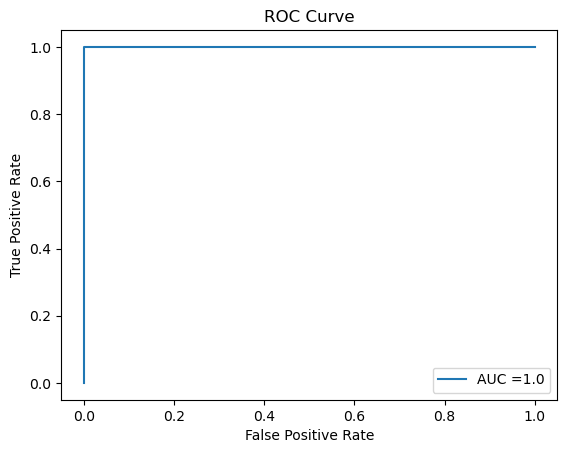

In [144]:
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred.detach().cpu().numpy())
auc = metrics.roc_auc_score(y_test, y_pred.detach().cpu().numpy())
plt.plot(fpr, tpr, label="AUC ="+str(auc))
plt.legend(loc=4)
plt.title("ROC Curve")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
#완벽한 분류 모델 의미!

AUC가 1.0이고, Accuration, Precision, Sensitivity가 1.0에 근접하므로 완벽한 분류 모델임을 의미.

예제 4.5

In [147]:
#scikit-learn 이용
pima = pd.read_csv('pima-indians-diabetes.csv')

X = pima[['Pregnancies', 'Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
y = pima['Outcome']

데이터 준비

In [149]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

데이터 분할 -> 전체 데이터의 25%를 테스트 데이터로, 75%를 학습 데이터로 사용.

In [151]:
# instantiate the model (using the default parameters)
model = LogisticRegression()

# fit the model with data
model.fit(X_train,y_train)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

모델 : 로지스틱회귀 -> 학습

In [153]:
#prediction
y_pred = model.predict(X_test)

이전에 분할했던 테스트 데이터로 예측.

In [155]:
#confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
TN=confusion_matrix[0][0]
FP=confusion_matrix[0][1]
FN=confusion_matrix[1][0]
TP=confusion_matrix[1][1]
precision= TP/(TP+FP)
sensitivity=TP/(TP+FN)
specificity=TN/(FP+TN)
accuracy=(TP+TN)/(TP+TN+FP+FN)
print("Confusion Matrix : \n", confusion_matrix)
print("Precision : ", round(precision,4))
print("Sensitivity : ", round(sensitivity,4))
print("Specificity : ", round(specificity,4))
print("Accuracy : ", round(accuracy,4))

Confusion Matrix : 
 [[115  15]
 [ 25  37]]
Precision :  0.7115
Sensitivity :  0.5968
Specificity :  0.8846
Accuracy :  0.7917


테스트용 정답 데이터와 예측 데이터로 혼동 행렬 생성.
생성 후 각 지표를 소수점 넷째자리까지 반올림.

(192, 2)
[[0.02566832 0.97433168]
 [0.83970251 0.16029749]
 [0.92320217 0.07679783]
 [0.31938215 0.68061785]
 [0.87785029 0.12214971]]
[0.97433168 0.16029749 0.07679783 0.68061785 0.12214971]


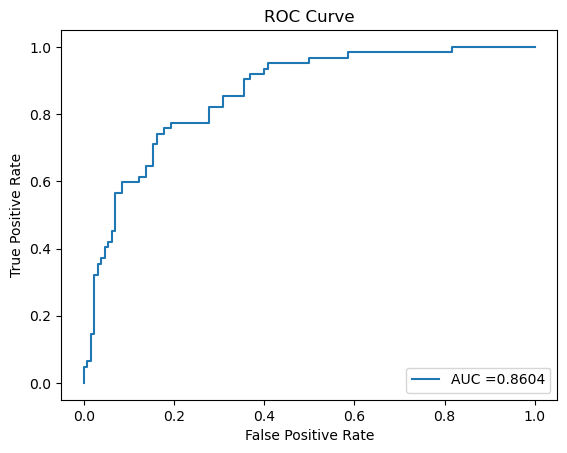

In [157]:
#ROC 및 AUC 곡선
y_pred_proba = model.predict_proba(X_test)
print(y_pred_proba.shape)
print(y_pred_proba[0:5,:])
# 레이블 값이 1일때의 예측 확률을 추출 
y_pred_proba = model.predict_proba(X_test)[:,1]
print(y_pred_proba[0:5])
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
auc =round(auc, 4)
plt.plot(fpr, tpr, label="AUC ="+str(auc))
plt.legend(loc=4)
plt.title("ROC Curve")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

model.predict_proba(X_test)는 테스트 데이터에 대해
각 클래스(0, 1)에 속할 확률을 반환.
shape은 (샘플 수, 클래스 수)
y_pred_proba[0:5, :]는 앞의 5개 샘플에 대해
[클래스 0 확률, 클래스 1 확률]을 보여줌.

y_pred_proba = model.predict_proba(X_test)[:, 1]에서 
[:, 1]은 **클래스 1(양성)**에 대한 예측 확률만 추출.

이후 다양한 임계값에서 FPR, TPR, AUC 계산, ROC 곡선 시각화.
이 때, AUC는 소수점 넷째자리까지 반올림.

In [158]:
#파이토치 이용
pima = pd.read_csv('pima-indians-diabetes.csv')
print(pima.head())

X = pima.drop('Outcome' , axis = 1).values
y = pima['Outcome'].values 

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


데이터셋을 pandas로 불러오고, Outcome 칼럼을 종속 변수로, 나머지 칼럼을 설명 변수로. NumPy배열 형태로.

In [159]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y , test_size =0.25,random_state=0)

# Creating Tensors
X_train=torch.FloatTensor(X_train).to(device)
X_test=torch.FloatTensor(X_test).to(device)
y_train=torch.FloatTensor(y_train).view(-1,1).to(device)
y_test=torch.FloatTensor(y_test).view(-1,1).to(device)

print(X_train.shape)
print(y_train.shape)

import torch
from torch import sigmoid
import torch.nn.functional as F

W = torch.zeros((8, 1),device=device, requires_grad=True)
b = torch.zeros(1, device=device, requires_grad=True)

torch.Size([576, 8])
torch.Size([576, 1])


위와 똑같이 학습 데이터 분할,

넘파이 배열을 PyTorch 텐서로 변환 후 y_train, y_test는 .view(-1,1)로 (샘플수, 1) 형태로 reshape.

입력 특성 수(클래스 수)에 맞게 가중치 W를 (8,1)로 초기화, 편향 b도 0으로 초기화.


In [160]:
optimizer=torch.optim.Adam([W,b],lr=0.01)
epochs=3000
for epoch in range(epochs):
    y_pred = torch.sigmoid(X_train.matmul(W)+ b).to(device)   
    loss = F.binary_cross_entropy(y_pred, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
   
    if (epoch+1) % 1000 == 0:
        print('epoch=',epoch+1, 'a=', W.detach().cpu().numpy(),
              'b=', b.detach().cpu().numpy(), 'loss=',loss.detach().cpu().numpy())

epoch= 1000 a= [[ 8.3903380e-02]
 [ 2.2933833e-02]
 [-1.8483378e-02]
 [ 5.4355604e-03]
 [-3.6933002e-04]
 [ 4.2829312e-02]
 [ 5.6375271e-01]
 [ 8.6207874e-03]] b= [-4.446911] loss= 0.50745726
epoch= 2000 a= [[ 8.6177833e-02]
 [ 3.0404110e-02]
 [-1.3236516e-02]
 [ 6.3579916e-03]
 [-4.5774464e-04]
 [ 7.3479235e-02]
 [ 7.8632736e-01]
 [ 1.8230442e-02]] b= [-7.1531386] loss= 0.48611063
epoch= 3000 a= [[ 8.6538687e-02]
 [ 3.2537807e-02]
 [-1.1524527e-02]
 [ 6.0187187e-03]
 [-7.9744699e-04]
 [ 8.4363073e-02]
 [ 8.6660069e-01]
 [ 2.1119449e-02]] b= [-8.097676] loss= 0.48311716


1) Forward 계산 : 선형 결합 -> 시그모이드 함수로 0~1 확률로 변환
2) 손실 계산 : BCE Loss 사용.
3) 역전파 및 파라미터 업데이트
   1) 기울기 초기화
   2) 역전파로 기울기 계산
   3) 파라미터 (W,b) 업데이트
5) 중간 결과 출력
   1000에폭마다 가중치, 바이어스, 손실 출력.

In [161]:
y_pred = torch.sigmoid(X_test.matmul(W)+ b).to(device)
prediction = y_pred >= torch.FloatTensor([0.5]).to(device)

최종 학습된 예측 데이터를 기준으로 0.5이상이면 1, 이하면 0

In [162]:
#confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test.cpu().numpy(), prediction.cpu().numpy())
TN=confusion_matrix[0][0]
FP=confusion_matrix[0][1]
FN=confusion_matrix[1][0]
TP=confusion_matrix[1][1]
precision= TP/(TP+FP)
sensitivity=TP/(TP+FN)
specificity=TN/(FP+TN)
accuracy=(TP+TN)/(TP+TN+FP+FN)
print ("Confusion Matrix : \n", confusion_matrix)
print ("Precision : ", round(precision,4))
print ("Sensitivity : ", round(sensitivity,4))
print ("Specificity : ", round(specificity,4))
print ("Accuracy : ", round(accuracy,4))

Confusion Matrix : 
 [[116  14]
 [ 26  36]]
Precision :  0.72
Sensitivity :  0.5806
Specificity :  0.8923
Accuracy :  0.7917


위와 같은 방식으로 혼동 행렬 및 평가 지표 계산.

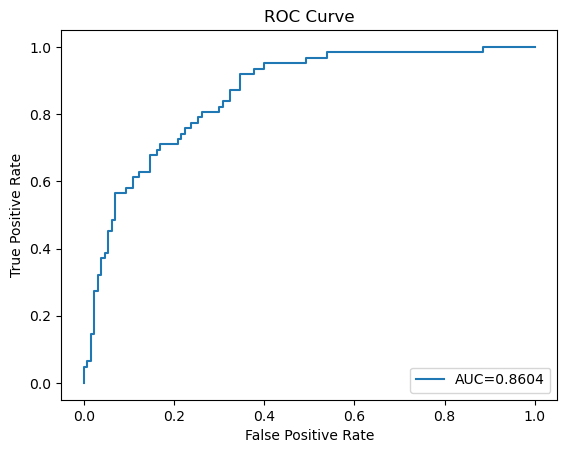

In [156]:
#ROC 및 AUC 곡선
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred.detach().cpu().numpy())
auc = metrics.roc_auc_score(y_test, y_pred_proba)
auc=round(auc,4)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend(loc=4)
plt.title("ROC Curve")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

위와 같은 방식으로 ROC곡선 및 AUC 시각화